In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

In [96]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)

# 1 

In [97]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [98]:
X = data[[2,4,10,11,12]]
y = (data[14]==' >50K').astype(int)
X, y = shuffle(X, y, random_state=0)
y

22278    0
8950     0
7838     0
16505    0
19140    1
        ..
13123    1
19648    0
9845     0
10799    1
2732     0
Name: 14, Length: 32561, dtype: int32

In [99]:
X

,2,4,10,11,12
22278,177119,10,0,0,44
8950,216481,13,0,0,40
7838,256263,12,0,0,40
16505,147640,3,0,1902,40
19140,172822,7,0,2824,76
...,...,...,...,...,...
13123,33331,14,0,0,40
19648,98466,6,0,0,35
9845,45317,10,0,0,40
10799,215862,16,7688,0,45


In [100]:
x=[]
for i in range(len(X)):
    help=[]
    for j in range(5):
        help.append(X.iat[i,j])
    x.append(help)


In [101]:
y.value_counts()

0    24720
1     7841
Name: 14, dtype: int64

In [102]:
y.shape

(32561,)

In [103]:
len(x)

32561

In [104]:
y = y[0:100]
x= x[0:100]

In [105]:
y.shape

(100,)

[Text(0.7, 0.9666666666666667, 'x[1] <= 13.5\ngini = 0.385\nsamples = 100\nvalue = [74, 26]'),
 Text(0.56, 0.9, 'x[0] <= 361760.5\ngini = 0.325\nsamples = 88\nvalue = [70, 18]'),
 Text(0.48, 0.8333333333333334, 'x[3] <= 2224.5\ngini = 0.255\nsamples = 80\nvalue = [68, 12]'),
 Text(0.44, 0.7666666666666667, 'x[4] <= 87.0\ngini = 0.224\nsamples = 78\nvalue = [68, 10]'),
 Text(0.4, 0.7, 'x[2] <= 5549.5\ngini = 0.206\nsamples = 77\nvalue = [68, 9]'),
 Text(0.36, 0.6333333333333333, 'x[0] <= 36348.0\ngini = 0.188\nsamples = 76\nvalue = [68, 8]'),
 Text(0.32, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.5666666666666667, 'x[4] <= 44.5\ngini = 0.169\nsamples = 75\nvalue = [68, 7]'),
 Text(0.24, 0.5, 'x[0] <= 200875.5\ngini = 0.098\nsamples = 58\nvalue = [55, 3]'),
 Text(0.2, 0.43333333333333335, 'x[0] <= 198254.5\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.16, 0.36666666666666664, 'x[0] <= 101916.5\ngini = 0.093\nsamples = 41\nvalue = [39, 2]'),
 Te

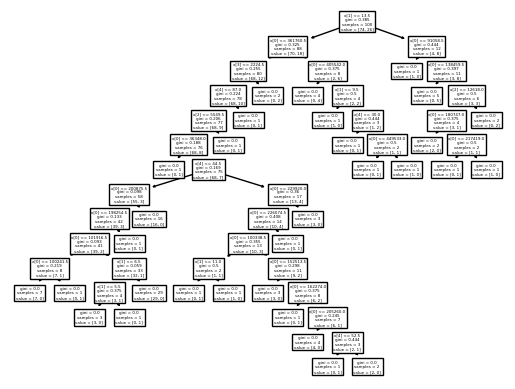

In [106]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(x, y)
tree.plot_tree(clf)

# 2

In [107]:
len(x)

100

In [108]:
x1, x2, x3, x4, x5=[],[],[],[],[]
for i in range(len(x)):
    x1.append(x[i][0])
    x2.append(x[i][1])
    x3.append(x[i][2])
    x4.append(x[i][3])
    x5.append(x[i][4])

In [109]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0         
                                ).fit(x,y)

In [110]:
clf.feature_importances_  #значимость признаков 

array([0.57927581, 0.14718357, 0.07293265, 0.03175634, 0.16885164])

In [111]:
clf.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23D3C06EF40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23D3C06EF40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23D3C06EF40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23D3C06EF40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23D3C06EF40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x23D3C06EF40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
             

In [112]:
len(clf.estimators_)

1000

# 3

In [139]:
X = data[[2,4,10,11,12]]
y = (data[14]==' >50K').astype(int)
X, y = shuffle(X, y, random_state=0)

In [140]:
def crossval(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    scor = []
    for train, test in kf.split(X):
        #print("%s %s" % (train, test))
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        q = np.array([(p==y_test).sum()/y_test.shape[0] for p in clf.staged_predict(X_test)])
        scor.append(q)
    return np.array(scor)

In [141]:
depth = [3,2,1]

3
2
1


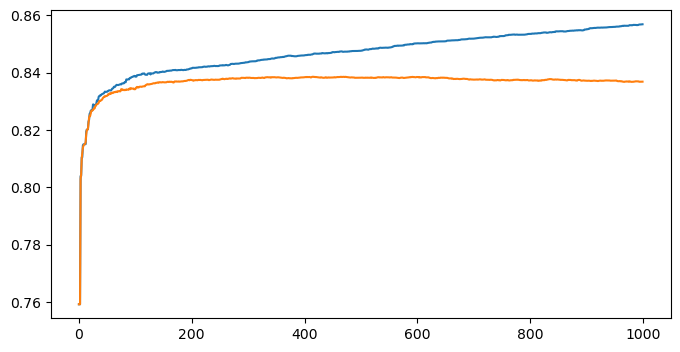

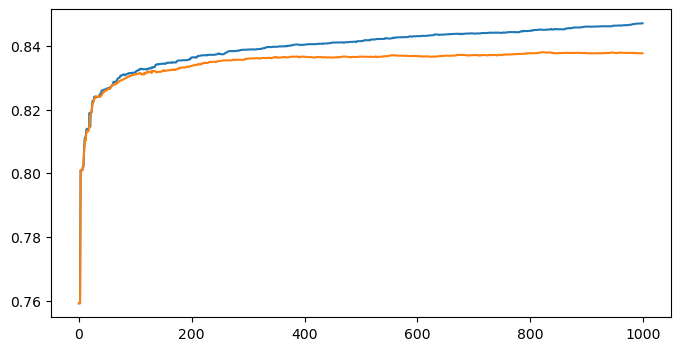

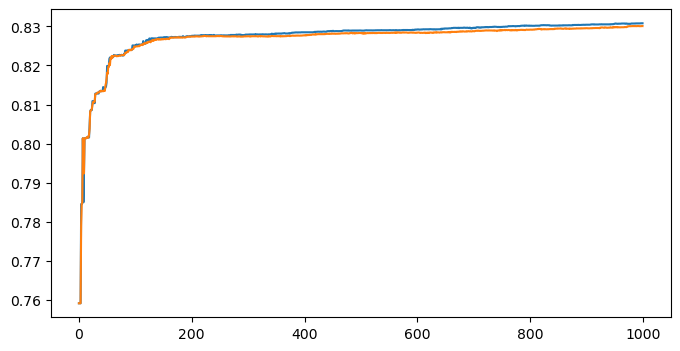

In [142]:
for dep in depth:
    clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=dep, random_state=0 #1000 кол-во деревьев
                            # ,loss='exponential'
                            ).fit(X,y) 
    q = np.array([(p==y).sum()/y.shape[0] for p in clf.staged_predict(X)])#Predict classes at each stage for X.
    
    
    model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=dep, random_state=0)
    q_cv = crossval(X,y,model,5)
    print(dep)

    plt.figure(figsize=(8,4))
    plt.plot(q)
    plt.plot(q_cv.mean(axis=0))
    

# 4

In [143]:
X = data[[2,4,10,11,12]]
y = (data[14]==' >50K').astype(int)
X, y = shuffle(X, y, random_state=0)

In [144]:
depth = [3,2,1]
num_trees=[1000,100]

In [145]:
def crossval(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    scor = []
    for train, test in kf.split(X):
        #print("%s %s" % (train, test))
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        q = np.array([(p==y_test).sum()/y_test.shape[0] for p in clf.staged_predict(X_test)])
        scor.append(q)
    return np.array(scor)

In [190]:
clf = GradientBoostingClassifier(n_estimators=n_tree, learning_rate=0.1, max_depth=dep, random_state=0
                        # ,loss='exponential'
                        ).fit(X,y)
for p in clf.staged_predict(X):
    print(p)

<generator object GradientBoostingClassifier.staged_predict at 0x0000023D408FFA00>

In [196]:
for p in clf.staged_predict(X):
    print((p))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ...

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ...

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


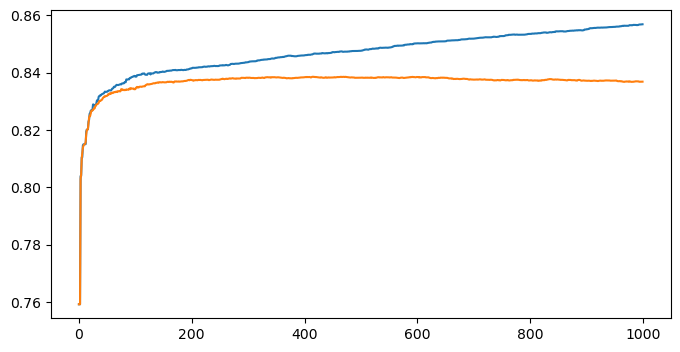

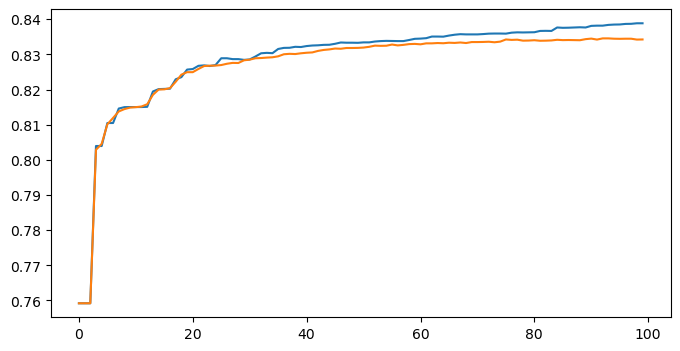

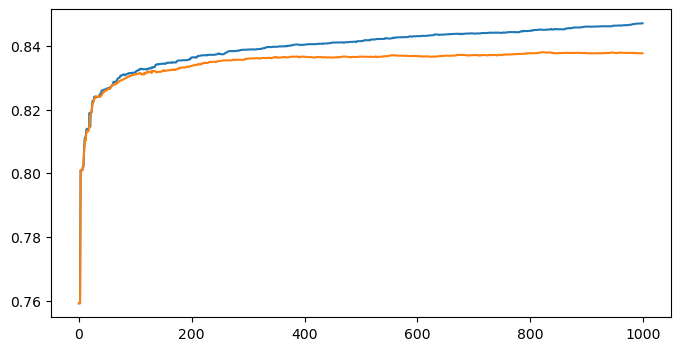

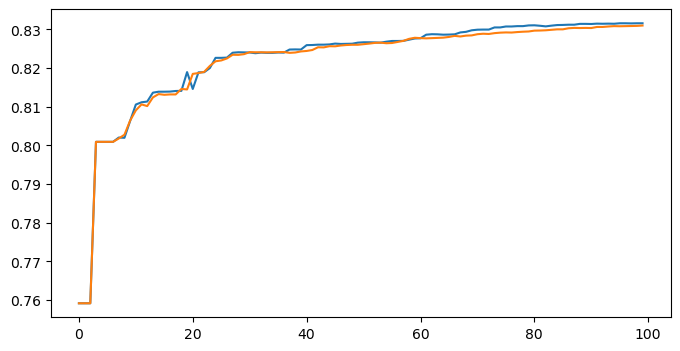

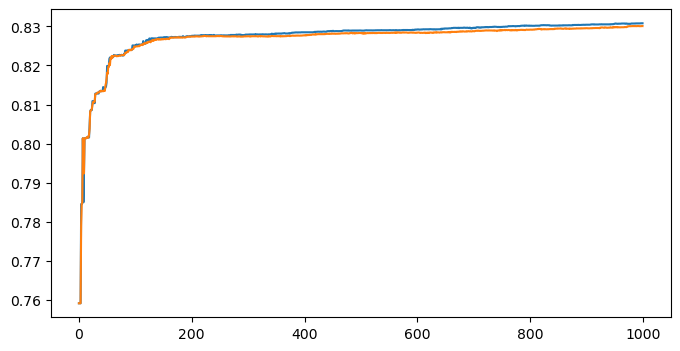

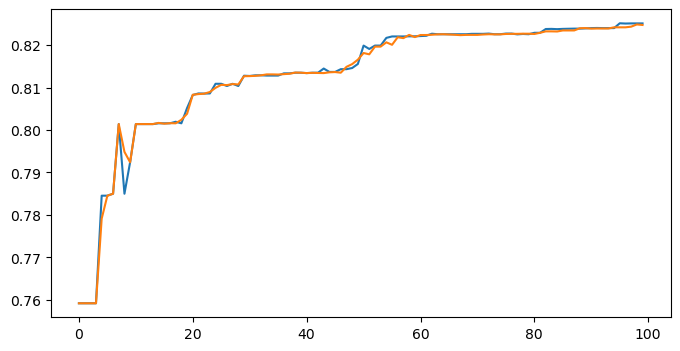

In [146]:
for dep in depth:
    for n_tree in num_trees:
        clf = GradientBoostingClassifier(n_estimators=n_tree, learning_rate=0.1, max_depth=dep, random_state=0
                                # ,loss='exponential'
                                ).fit(X,y)
        q = np.array([(p==y).sum()/y.shape[0] for p in clf.staged_predict(X)])
        model = GradientBoostingClassifier(n_estimators=n_tree, learning_rate=0.1, max_depth=dep, random_state=0)
        q_cv = crossval(X,y,model,5)
        plt.figure(figsize=(8,4))
        plt.plot(q)
        plt.plot(q_cv.mean(axis=0))

# 5

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
X = data[[2,4,10,11,12]]
y = (data[14]==' >50K').astype(int)
X, y = shuffle(X, y, random_state=0)

In [201]:
depth = [3,2,1]
num_trees=[1000,100]

In [202]:
def crossval(X,y,model,n_splits):
    kf = KFold(n_splits)
    q_cv = np.zeros(X.shape[0])
    scor = []
    for train, test in kf.split(X):
        #print("%s %s" % (train, test))
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train,y_train)
        q = np.array([(p==y_test).sum()/y_test.shape[0] for p in clf.predict(X_test)])
        scor.append(q)
    return np.array(scor)

In [203]:
y

22278    0
8950     0
7838     0
16505    0
19140    1
        ..
13123    1
19648    0
9845     0
10799    1
2732     0
Name: 14, Length: 32561, dtype: int32

In [224]:
helpp1 = []
for i in range(1,100):
    clf = RandomForestClassifier(n_estimators=i, max_depth=3).fit(X,y)
    n_estimators = 100
    q = np.array([(clf.predict(X)==y).sum()/y.shape[0] ])
    helpp1.append(q)

helpp2 = []
for i in range(1,100):
    clf = RandomForestClassifier(n_estimators=i, max_depth=2).fit(X,y)
    n_estimators = 100
    q = np.array([(clf.predict(X)==y).sum()/y.shape[0] ])
    helpp2.append(q)

    
helpp3 = []
for i in range(1,100):
    clf = RandomForestClassifier(n_estimators=i, max_depth=1).fit(X,y)
    n_estimators = 100
    q = np.array([(clf.predict(X)==y).sum()/y.shape[0] ])
    helpp3.append(q)
# num1=0
# num2 = n_estimators
# c = clf.predict(X)

# n = n_estimators
# m = len(c)
# helpp=[[0] * m for i in range(n)]

# while num2 <= len(c):
#     ones = 0
#     zeros=0
#     for p in (num1,num2):
#         if c[p]==1:
#             ones = ones+1
#         else:
#             zeros = zeros+1
#         if ones>=zeros:
#             helpp.append(1)
#         else:
#             helpp.append(0)
            
#         num1 = num2
#         num2 = num2 +n_estimators


array([0.80261663])

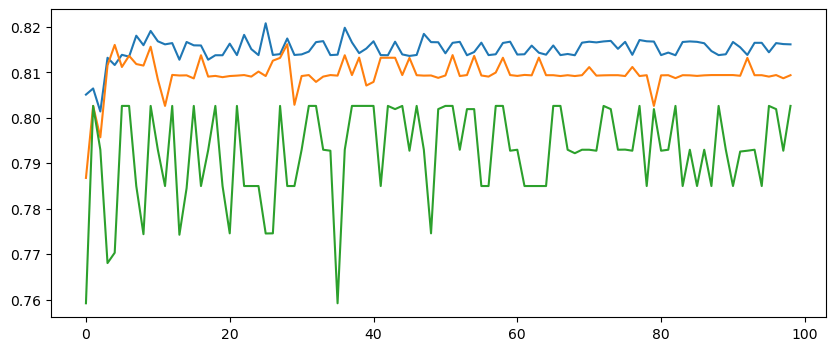

In [225]:
plt.figure(figsize=(10,4))
plt.plot(helpp1)
plt.plot(helpp2)
plt.plot(helpp3)
(q)